# HEART ATTACK PREDICTION USING DIFFERENT ML MODELS

##DATA READING AND PREPARATION


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import pandas_profiling as pp

In [2]:
df= pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##**EDA**


In [4]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 39.9 MB/s 
     |████████████████████████████████| 690 kB 44.5 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 812 kB 59.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a4b93e4f3710701b60fded4b30e8e1bb8d530553d89c56f5fb2467e7f2718cbf
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=24b5f80fa4a120b287641a5d0a5638b9b5ccbc77caf6621c52fb77a044d290f9
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin i

In [5]:
from pandas_profiling import ProfileReport
pf=ProfileReport(df)
pf.to_file(output_file='eda.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The EDA report has been saved in the eda.html file.


##**MODEL PREPARATION**

In [6]:
y= df['target']
x=df.drop('target',axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

checking whether data is equally splitted or not, because if data is not equally splitted it will cause for data imbalancing


In [8]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 109, 1: 133})

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

##**ML MODELS**

Here we take different ML Models and try to predict accurately.


1.   Logitsic Regression 
2.   Naive Bayes 
3.   Random Forest Classifier
4.   Extreme Gradient Boost
5.   K-Nearest Neighbours
6.   Decision Tree
7.   SVM


In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [11]:
#1
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
lr_conf_matrix=confusion_matrix(y_test,lr_predict)
lr_acc_score=accuracy_score(y_test,lr_predict)
print("confusion matrix:")
print(lr_conf_matrix)
print("\n")
print("Accuracy of LOGISTIC REGRESSION : ", lr_acc_score*100)
print("classification report: ")
print(classification_report(y_test,lr_predict))


confusion matrix:
[[25  4]
 [ 3 29]]


Accuracy of LOGISTIC REGRESSION :  88.52459016393442
classification report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [12]:
#2
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
nb_conf_matrix=confusion_matrix(y_test,nbpred)
nb_acc_score=accuracy_score(y_test,nbpred)
print("confusion matrix : ")
print(nb_conf_matrix)
print("\n")
print("Accuracy of NAIVE BAYES model : ",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confusion matrix : 
[[25  4]
 [ 3 29]]


Accuracy of NAIVE BAYES model :  88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [13]:
#3
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=42,max_depth=5)
rf.fit(x_train,y_train)
rf_predicted=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[25  4]
 [ 4 28]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [50]:
#4
#Extreme Gradient Boost
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))


confussion matrix
[[26  3]
 [ 3 29]]


Accuracy of Extreme Gradient Boost: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [21]:
#5 KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)#10
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[25  4]
 [ 3 29]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [25]:
#6 DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[26  3]
 [ 4 28]]


Accuracy of DecisionTreeClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [28]:
#7 SVC
from sklearn.svm import SVC
#ensembling
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[25  4]
 [ 4 28]]


Accuracy of Support Vector Classifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



    feature  importance
10      f7          21
2       f4          17
9       f9          16
3      f12          15
11      f0          15
7       f3          13
8      f10          12
4       f1          11
1       f2          10
6      f11          10
0       f8           7
12      f6           6
5       f5           3


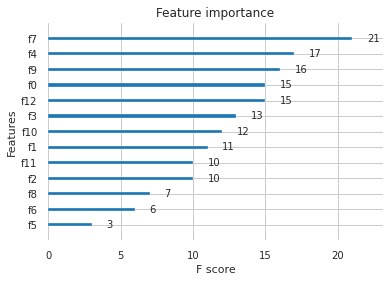

In [63]:
#Features ['age':0, 'sex':1, 'cp':2, 'trestbps':3, 'chol':4, 'fbs':5, 'restecg':6, 'thalach':7,'exang':8, 'oldpeak':9, 'slope':10, 'ca':11, 'thal':12],
                            
xgb_fea_imp=pd.DataFrame(list(xgb.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
xgb_fea_imp.to_csv('xgb_fea_imp.csv')

from xgboost import plot_importance
plot_importance(xgb, )

##COMPARISON OF THE MODELS

In [31]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,88.524590
1,Naive Bayes,88.524590
2,Random Forest,86.885246
3,Extreme Gradient Boost,90.163934
4,K-Nearest Neighbour,88.524590
5,Decision Tree,88.524590
6,Support Vector Machine,86.885246


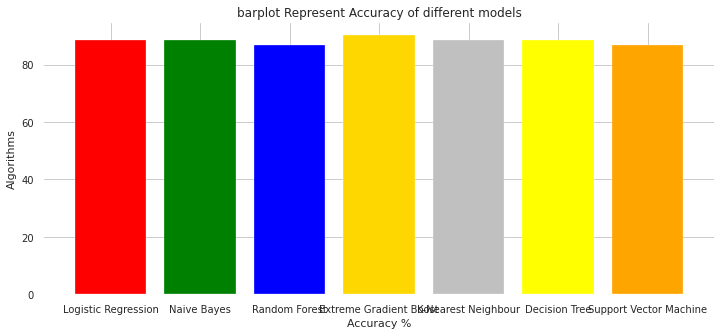

In [32]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

##ENSEMBLING

To Improve accuracy, we use ensembling. Here we use the stacking technique

In [72]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier

In [81]:
y_train=y_train.to_numpy()

In [86]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[26  3]
 [ 3 29]]


Accuracy of StackingCVClassifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



##CONCLUSION


1. EXTREME GRADIENT BOOST GIVES THE BEST ACCURACY.

2. EXERCISED INDUCED ANGINA, CHEST PAIN IS THE MAJOR SYMPTOMS OF HEART ATTACK.